In [102]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score



In [11]:
pip install yfinance


In [103]:
import yfinance as yf

In [104]:
df = yf.download("CSBBANK.NS", start="2020-01-01", end="2024-01-01")
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,CSBBANK.NS,CSBBANK.NS,CSBBANK.NS,CSBBANK.NS,CSBBANK.NS
Date,,,,,
2020-01-01,206.899994,218.750000,206.199997,215.000000,873909
2020-01-02,211.300003,217.949997,206.500000,206.500000,1329504
2020-01-03,208.050003,211.300003,206.300003,211.300003,538331
2020-01-06,199.899994,207.000000,198.300003,206.100006,582365
2020-01-07,207.850006,209.899994,201.500000,201.899994,733142
...,...,...,...,...,...
2023-12-22,396.700012,401.000000,392.399994,392.899994,139916
2023-12-26,396.100006,401.000000,392.700012,400.000000,358527


In [105]:
df['Day'] = np.arange(len(df))  # optional time-based feature
features = ['Open', 'High', 'Low', 'Volume', 'Day']  # input features
X = df[features]
y = df['Close']  # target


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [107]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [108]:
y_pred = model.predict(X_test)


In [109]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 7.593138243234059
R-squared: 0.9964504615104552


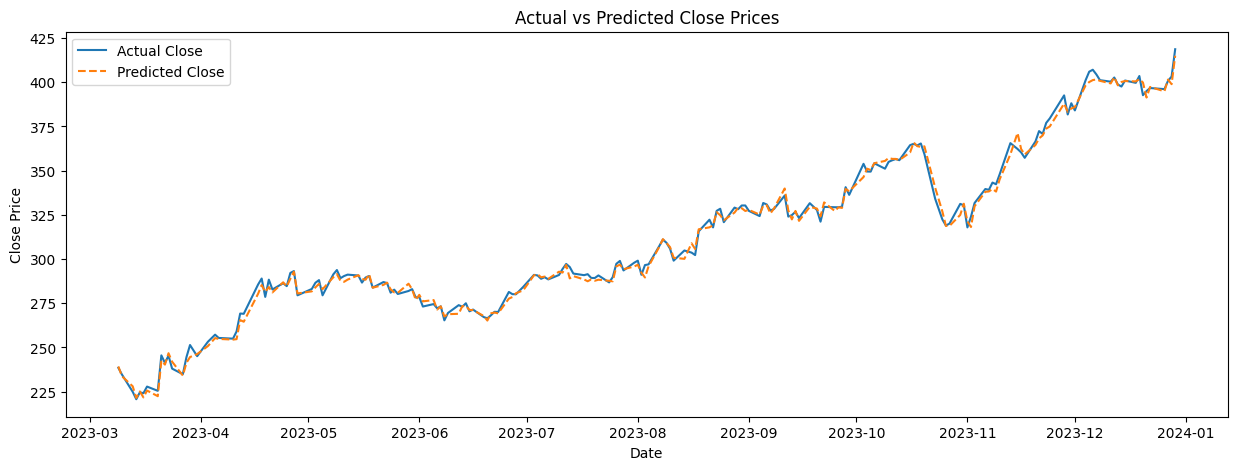

In [111]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(y_test.index, y_test.values, label='Actual Close')
plt.plot(y_test.index, y_pred, label='Predicted Close', linestyle='--')
plt.legend()
plt.title("Actual vs Predicted Close Prices")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()


In [112]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [118]:
df = yf.download("CSBBANK.NS", start="2020-01-01", end="2024-01-01")
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,CSBBANK.NS,CSBBANK.NS,CSBBANK.NS,CSBBANK.NS,CSBBANK.NS
Date,,,,,
2020-01-01,206.899994,218.750000,206.199997,215.000000,873909
2020-01-02,211.300003,217.949997,206.500000,206.500000,1329504
2020-01-03,208.050003,211.300003,206.300003,211.300003,538331
2020-01-06,199.899994,207.000000,198.300003,206.100006,582365
2020-01-07,207.850006,209.899994,201.500000,201.899994,733142
...,...,...,...,...,...
2023-12-22,396.700012,401.000000,392.399994,392.899994,139916
2023-12-26,396.100006,401.000000,392.700012,400.000000,358527


In [119]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [120]:
y_pred = model.predict(X_test)

In [121]:
print("MSE:", mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("XGBoost R² Score:", r2)

MSE: 259.3063659667969
XGBoost R² Score: 0.8787829279899597


In [122]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [123]:
df = yf.download("CSBBANK.NS", start="2020-01-01", end="2024-01-01")
data = df[['Close']].values
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

[*********************100%***********************]  1 of 1 completed


In [124]:
X, y = [], []
for i in range(60, len(scaled)):
    X.append(scaled[i-60:i])
    y.append(scaled[i])
X, y = np.array(X), np.array(y)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 0.0563
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0031
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0022
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0015
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0016
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 0.0017
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0015
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0013
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0014
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0012


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step
LSTM R² Score: 0.9052911730541134


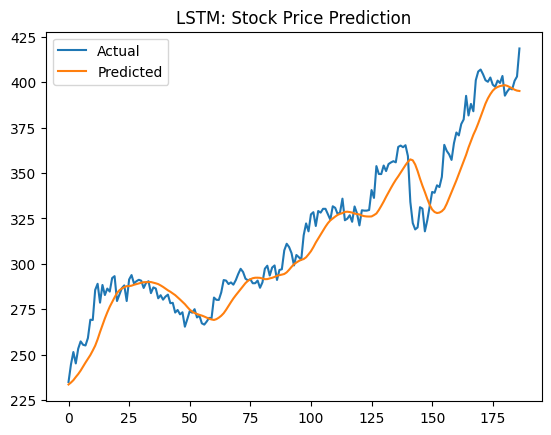

In [125]:

# Split
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(60, 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predict
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

r2 = r2_score(y_test, y_pred)
print("LSTM R² Score:", r2)

# Optional: Plot predictions
import matplotlib.pyplot as plt
plt.plot(y_test, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("LSTM: Stock Price Prediction")
plt.show()

[*********************100%***********************]  1 of 1 completed


Moving Average R² Score (vs MA10): 0.9757591399346227


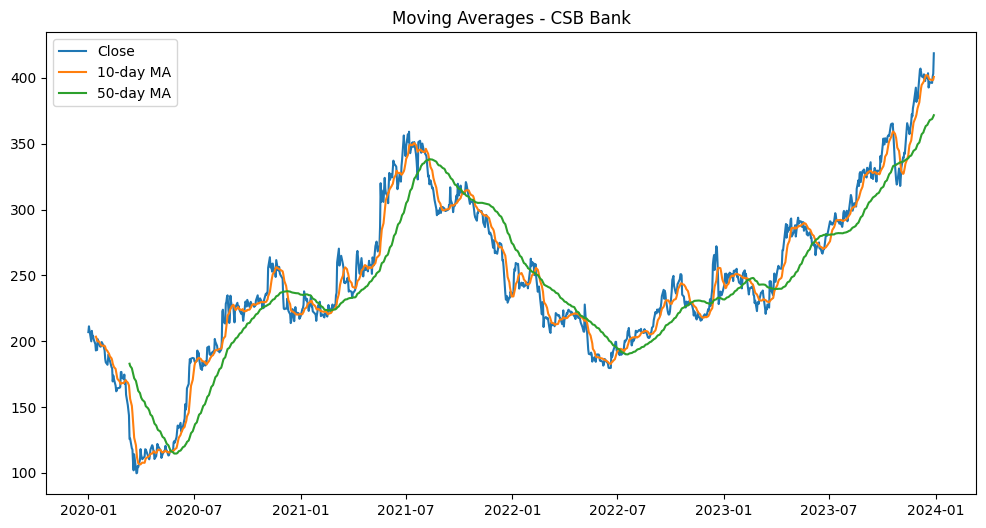

In [126]:

df = yf.download("CSBBANK.NS", start="2020-01-01", end="2024-01-01")
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()
df_ma = df.dropna()
r2 = r2_score(df_ma['Close'], df_ma['MA10'])
print("Moving Average R² Score (vs MA10):", r2)

# Plot
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close')
plt.plot(df['MA10'], label='10-day MA')
plt.plot(df['MA50'], label='50-day MA')
plt.legend()
plt.title("Moving Averages - CSB Bank")
plt.show()


In [127]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [128]:
# Step 1: Download stock data
df = yf.download("CSBBANK.NS", start="2020-01-01", end="2024-01-01")
df.dropna(inplace=True)

# Step 2: Feature engineering
df['Day'] = np.arange(len(df))  # Time-based feature
features = ['Open', 'High', 'Low', 'Volume', 'Day']
X = df[features]
y = df['Close']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 4: Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Predict
y_pred = rf_model.predict(X_test)

# Step 6: Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest MSE:", mse)
print("Random Forest R² Score:", r2)

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest MSE: 293.1933782517788
Random Forest R² Score: 0.8629418894207994
